# Homework 2 (Dev Mody)
## Exercise 1 : Momentum Accelerated Gradient Descent

In this exercise we you will implement a version of Momentum Accelerated Gradient Descent.
You can base your implementation on the version of gradient descent from the HW1 Python
notebook:

```python
import autograd.numpy as np
from autograd import grad
# gradient descent function - inputs: g (input function),
# alpha (steplength parameter),
# max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)
    # run the gradient descent loop
    weight_history = [w] # container for weight history
    cost_history = [g(w)] # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
```
Here, `g` is the function we're trying to minimize, `alpha` is the step length, `max_its` is the maximum number of iterations to be taken and `w` is the starting vector. Momentum Accelerated Gradient Descent changes this and instead uses an exponentially average descent direction according to:

$$d^{k - 1} = \beta d^{k - 2} + (1 - \beta)(- \Delta g (w^{k - 1}))$$
$$w^k = w^{k - 1} + \alpha \times d^{k - 1}$$
with $d^0 = -\Delta g(w^0)$

### Exercise 1.1: Implementing Momentum Accelerated Gradient Descent

Modify the above GD implementation to perform Momentum Accelerated GD where we use `alpha` as the step length. Use auto-grad in the following manner:

```python
from autograd import value_and_grad
gradient = value_and_grad(g)
cost_eval, grad_eval = gradient(w)
```

ANSWER: The implementation for Momentum Accelerated Gradient Descent is as follows:

In [16]:
import autograd.numpy as np
from autograd import value_and_grad, grad

def gradient_descent (g, alpha, max_its, w, beta):
    """
    Performs Momentum Accelerated Gradient Descent.
    
    Parameters:
        g (function): The objective function to minimize.
        alpha (float): Step size (learning rate).
        max_its (int): Maximum number of iterations.
        w (numpy array): Initial weights.
        beta (float): Momentum factor (0 ≤ beta < 1).
    
    Returns:
        tuple: (weight_history, cost_history) 
               where weight_history contains iterates of w,
               and cost_history contains corresponding function values.
    """
    gradient = value_and_grad(g)
    d = -gradient(w)[1]
    
    weight_history = [w]
    cost_history = [g(w)]
    for _ in range (max_its):
        _,grad = gradient(w)
        d = (beta*d)+((1-beta)*(-grad))
        w = w + alpha*d
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history
        

As mentioned in the algorithm, we initialize gradient `new_grad` and iteratively updates the starting vector `w` using a combination of the previous direction `beta * new_grad` and the current negative gradient `(1 - beta) * (-1) * grad`. The function stores the weight updates and the corresponding cost values in `weight_history` and `cost_history`, returning them at the end.

### Exercise 1.2: Testing it out

We now want to study a simple quadratic function $$g(w) = w^TCw$$ with the matrix `C = [[0.5, 0], [0, 9.75]]`. In Python, we can implement this in a straight forward manner as shown below:
```python
C = np.array([[0.5,0],[0,9.75]])
g = lambda w: np.dot(np.dot(w.T,C),w)
```
Fix $\alpha$ at 0.1 and perform 25 steps for three values of $\beta = 0, 0.1, 0.7$ in each case starting from $w^0 = (10, 1)$. Make a contour plot of $g(w)$ and indicate the `weight_history` on the plot for each of the three values of $\beta$. Also plot the `cost_history`

ANSWER: The following experiment is shown below:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

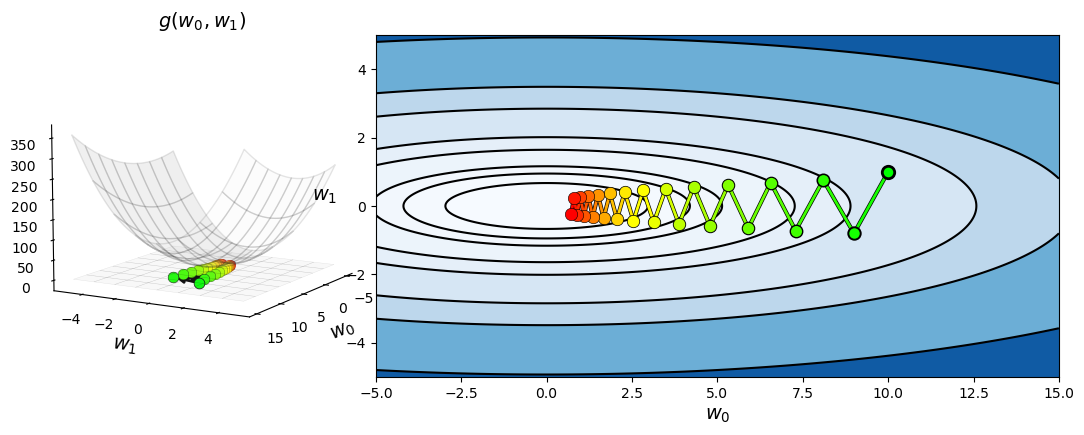

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

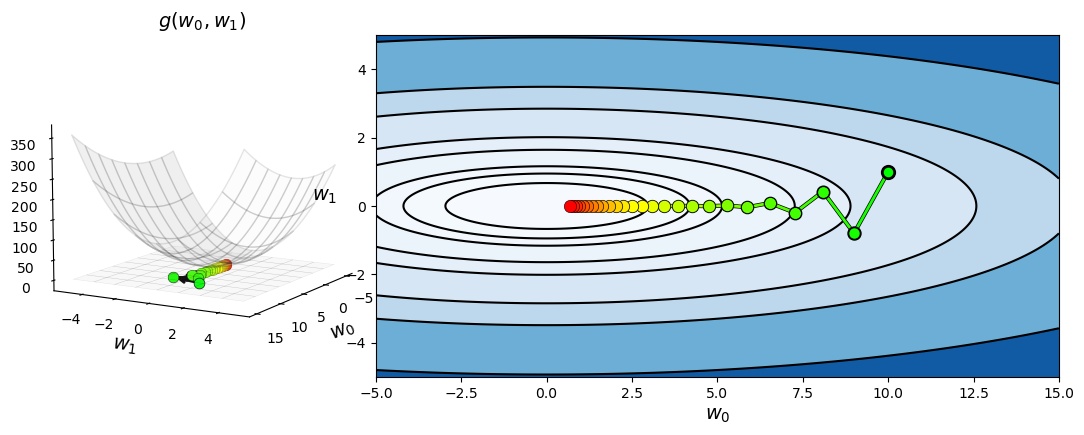

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

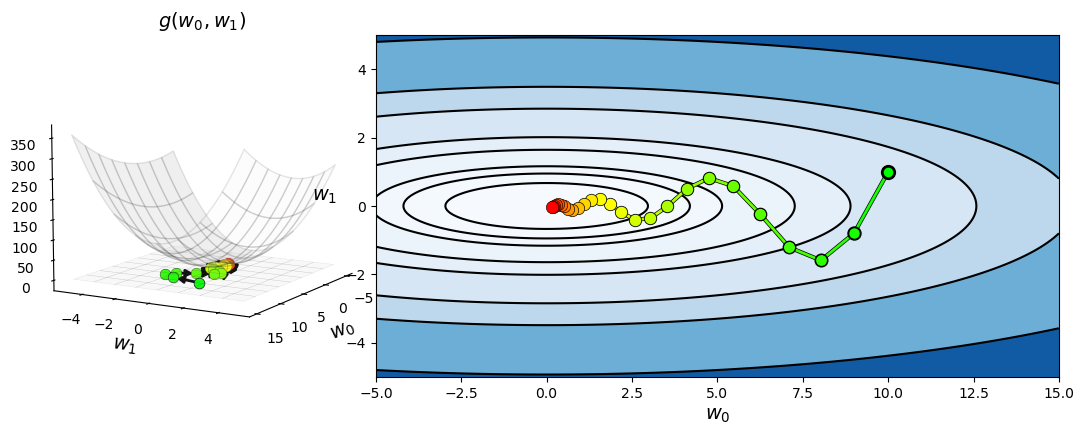

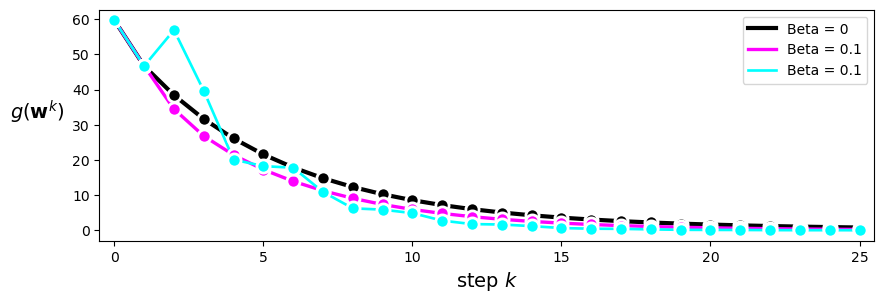

In [17]:
import sys
sys.path.append('homeworks/homework2/MLRPlotting')
import matplotlib.pyplot as plt
from MLRPlotting import static_plotter

static_plotter = static_plotter.Visualizer();

C = np.array([[0.5,0],[0,9.75]])
g = lambda w: np.dot(np.dot(w.T,C),w)

alpha = 0.1
beta_1 = 0
beta_2 = 0.1
beta_3 = 0.7
w_1 = np.array([10, 1])
w_2 = np.array([10, 1])
w_3 = np.array([10, 1])

weight_history_1, cost_history_1 = gradient_descent(g, alpha, 25, w_1, beta_1)
weight_history_2, cost_history_2 = gradient_descent(g, alpha, 25, w_2, beta_2)
weight_history_3, cost_history_3 = gradient_descent(g, alpha, 25, w_3, beta_3)

static_plotter.two_input_surface_contour_plot(g, weight_history_1, view=[10, 30], xmin=-5, xmax=15, ymin=-5, ymax=5, num_contours=20)
static_plotter.two_input_surface_contour_plot(g, weight_history_2, view=[10, 30], xmin=-5, xmax=15, ymin=-5, ymax=5, num_contours=20)
static_plotter.two_input_surface_contour_plot(g, weight_history_3, view=[10, 30], xmin=-5, xmax=15, ymin=-5, ymax=5, num_contours=20)

static_plotter.plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],start=0,points=True,labels=[r'Beta = 0',r'Beta = 0.1',r'Beta = 0.7'])

